# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
path = '/home/bruno/Documents/eLearning/CarND/CarND-Traffic-Sign-Classifier-Project/'
# path = './'

training_file = path+'input/train.p'
validation_file= path+'input/valid.p'
testing_file = path+'input/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
%cd ~/Documents/eLearning/CarND/CarND-Traffic-Sign-Classifier-Project/

/home/bruno/Documents/eLearning/CarND/CarND-Traffic-Sign-Classifier-Project


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
assert(len(X_train) == len(y_train))
n_train = len(X_train)

assert(len(X_valid) == len(y_valid))
n_valid = len(X_valid)

# TODO: Number of testing examples.
assert(len(X_test) == len(y_test))
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

First we will import some dependencies we will be using during the exploratory step

In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
import collections
import random

The first step is to see the distribution of our training dataset and identify potential issues with some classes being under-represented

In [7]:
# We will load the sign names from the provided csv file and add a counter to each sign class

# Read .csv file:
sign_names = pd.read_csv(path+'signnames.csv')

# Add counter:
df2 = pd.DataFrame.from_dict(collections.Counter(y_train), orient='index').reset_index()
df2 = df2.rename(columns={'index':'ClassId', 0:'Count'})
sign_names['NumImages'] = df2['Count']

# Will keep a copy of y_train before we start shuffling it around
y_train_copy = np.copy(y_train)

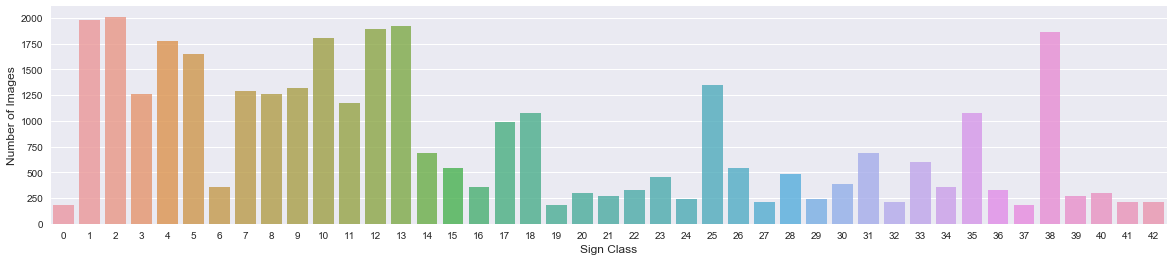

In [8]:
plt.figure(figsize=(20,4))
sns.barplot(sign_names['ClassId'].values, sign_names['NumImages'].values, alpha=0.8, )
plt.xlabel('Sign Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.show()

We can see that our dataset is very biased toward some classes. We will take a deeper look into the classes that are better represented and the classes that have very few training examples.

First let's begin with the classes that have very few samples.

Speed limit (20km/h) :


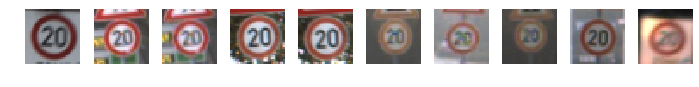

Go straight or left :


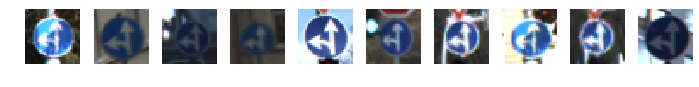

Dangerous curve to the left :


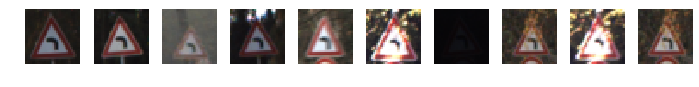

End of all speed and passing limits :


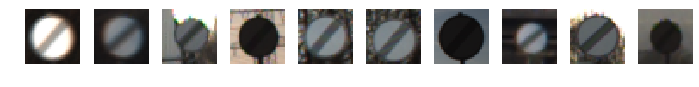

Pedestrians :


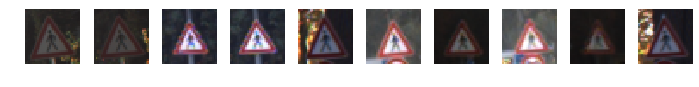

End of no passing :


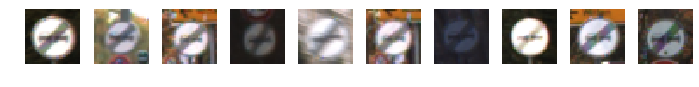

End of no passing by vehicles over 3.5 metric tons :


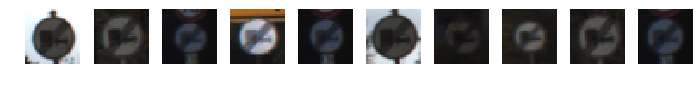

Road narrows on the right :


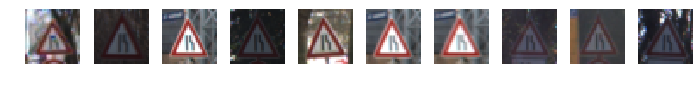

Bicycles crossing :


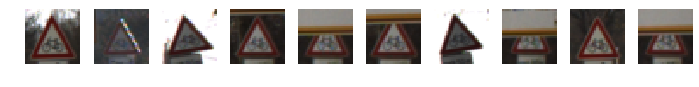

Keep left :


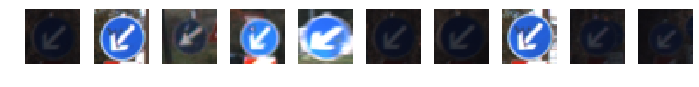

In [8]:
# Get the bottom 10 classes by ClassId
bottom10 = sign_names.sort_values(by=['NumImages'])[0:10]['ClassId'].values

for classid in bottom10:
    print (sign_names.SignName[classid],':')
    implot = plt.figure(figsize=(12,1))
    X_class = X_train[y_train==classid]
    rnd_idx = random.sample(range(len(X_class)), 10)
    for i in range(10):
        ax = implot.add_subplot(1,10,i + 1)
        ax.grid(False)
        ax.axis('off')
        ax.imshow(X_class[rnd_idx[i]])
    plt.show()

Speed limit (50km/h) :


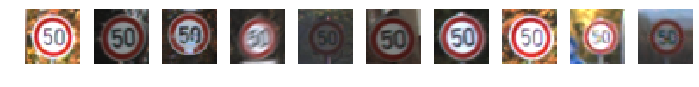

Speed limit (30km/h) :


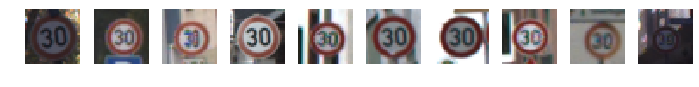

Yield :


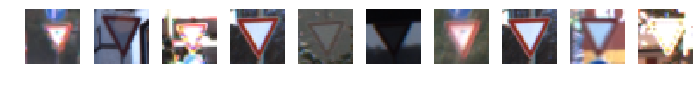

Priority road :


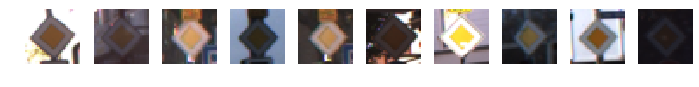

Keep right :


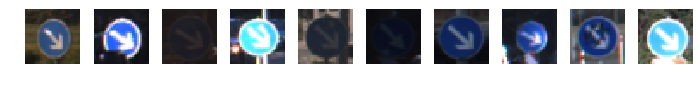

No passing for vehicles over 3.5 metric tons :


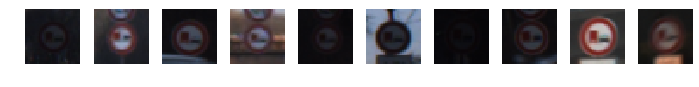

Speed limit (70km/h) :


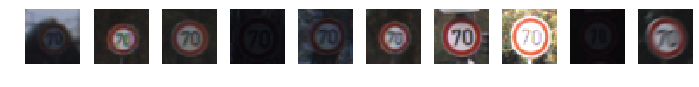

Speed limit (80km/h) :


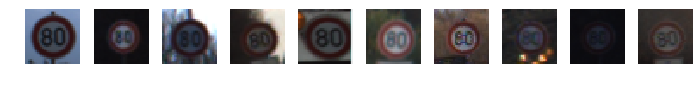

Road work :


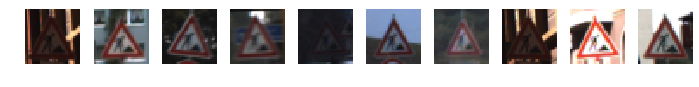

No passing :


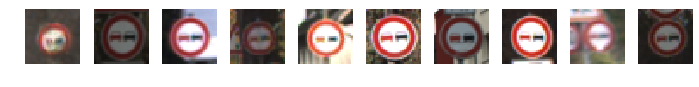

In [9]:
# Get the top 10 classes by ClassId
top10 = sign_names.sort_values(by=['NumImages'], ascending=False)[0:10]['ClassId'].values

for classid in top10:
    print (sign_names.SignName[classid],':')
    implot = plt.figure(figsize=(12,1))
    X_class = X_train[y_train==classid]
    rnd_idx = random.sample(range(len(X_class)), 10)
    for i in range(10):
        ax = implot.add_subplot(1,10,i + 1)
        ax.grid(False)
        ax.axis('off')
        ax.imshow(X_class[rnd_idx[i]])
    plt.show()

We can see that the quality of the images are very different one from another. This discrepancy will certainly impact our model if we are not careful with the pre-processing of these images.

On [1] the winners of the GTSRB challenge addressed this problem by normalizing the contrast during preprocessing.

On [2] the authors introduced more samples to the training dataset by applying translations, scaling and rotations during preprocessing.

We will follow their award winning approach to preprocessing before moving on to our model architecture.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Although the authors of [1] used color images to win the challenge, the authors of [2] did not see any significant improvement in using color as part of the pipeline. For that reason I have decided to use only grayscale images.

In [9]:
from importlib import reload
import cust; reload (cust)
from cust import *

import cv2

from skimage import exposure
from keras.utils import np_utils
from sklearn.utils import shuffle

In [10]:
#X_trn_pp = preprocess_array(X_train)
#X_val_pp = preprocess_array(X_valid)

In [11]:
#save_array(path+'models/X_train_preprocessed.dat', X_trn_pp)
#save_array(path+'models/X_valid_preprocessed.dat', X_val_pp)

In [12]:
X_trn_pp = load_array(path+'models/X_train_preprocessed.dat')
X_val_pp = load_array(path+'models/X_valid_preprocessed.dat')

y_trn_hot = np_utils.to_categorical(y_train)
y_val_hot = np_utils.to_categorical(y_valid)

assert X_trn_pp.shape[0] == y_trn_hot.shape[0]
assert X_val_pp.shape[0] == y_val_hot.shape[0]

# print(X_trn_pp.shape)
# print(X_val_pp.shape)

# print(trn_labels.shape)
# print(val_labels.shape)

In [13]:
pp_mean = np.mean(X_trn_pp)
X_trn_pp -= pp_mean
X_val_pp -= pp_mean

In [14]:
X_trn_pp, y_train = shuffle(X_trn_pp, y_train)
y_trn_hot = np_utils.to_categorical(y_train)

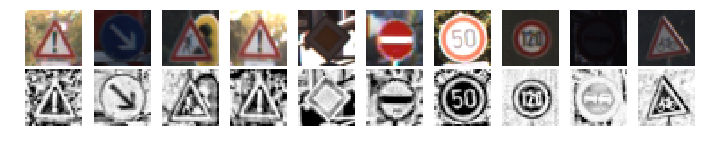

In [15]:
implot = plt.figure(figsize=(12,4))
rnd_idx = random.sample(range(len(X_train)), 10)
for i in range(10):
    ax1 = implot.add_subplot(2,10,i + 1)
    ax1.grid(False)
    ax1.axis('off')
    ax1.imshow(X_train[rnd_idx[i]])

    ax2 = implot.add_subplot(1,10,i + 1)
    ax2.grid(False)
    ax2.axis('off')
    ax2.imshow(img_preprocess(X_train[rnd_idx[i]])[:, :, 0])

plt.show()

### Model Architecture

In [16]:
import tensorflow as tf

from tensorflow.contrib.layers import flatten
from lenet_bg import *

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

First we will define some useful functions to help us train the model.

In [17]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [18]:
def acc_and_loss(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    softmax_cross_entropy = []
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        [accuracy, softmax] = sess.run([accuracy_operation, cross_entropy], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        softmax_cross_entropy.extend(softmax)
    return total_accuracy / num_examples, np.mean(softmax_cross_entropy)

In [19]:
"""
Forked from: 
https://github.com/navoshta/traffic-signs/blob/master/Traffic_Signs_Recognition.ipynb
"""

class EarlyStopping(object):
    """
    Provides early stopping functionality. Keeps track of model accuracy, 
    and if it doesn't improve over time restores last best performing 
    parameters.
    """
    
    def __init__(self, saver, session, patience = 100, minimize = True):
        """
        Initialises a `EarlyStopping` isntance.

        Parameters
        ----------
        saver     : 
                    TensorFlow Saver object to be used for saving and restoring model.
        session   : 
                    TensorFlow Session object containing graph where model is restored.
        patience  : 
                    Early stopping patience. This is the number of epochs we wait for 
                    accuracy to start improving again before stopping and restoring 
                    previous best performing parameters.
                  
        Returns
        -------
        New instance.
        """
        self.minimize = minimize
        self.patience = patience
        self.saver = saver
        self.session = session
        self.best_monitored_value = np.inf if minimize else 0.
        self.best_monitored_epoch = 0
        self.restore_path = None

    def __call__(self, value, epoch):
        """
        Checks if we need to stop and restores the last well performing values if we do.

        Parameters
        ----------
        value     : 
                    Last epoch monitored value.
        epoch     : 
                    Last epoch number.
                  
        Returns
        -------
        `True` if we waited enough and it's time to stop and we restored the 
        best performing weights, or `False` otherwise.
        """
        if (self.minimize and value < self.best_monitored_value) or (not self.minimize and value > self.best_monitored_value):
            self.best_monitored_value = value
            self.best_monitored_epoch = epoch
            self.restore_path = self.saver.save(self.session, path + "models/early_stopping_checkpoint")
        elif self.best_monitored_epoch + self.patience < epoch:
            if self.restore_path != None:
                self.saver.restore(self.session, self.restore_path)
            else:
                print("ERROR: Failed to restore session")
            return True
        
        return False

In [20]:
def train_nn(X_tr, y_tr, X_vl, y_vl, param):
    
    lr, EPOCHS, BATCH_SIZE, l2_lambda, model_name, resume_training, early_stopping_patience, \
    epochs_print = param

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_tr)
      
        if resume_training:
            try:
                saver.restore(sess, path + 'models/'+ model_name)
                print("Resuming previous training...")
            except:
                print("Training new model...")
        print()         
      
        early_stopping = EarlyStopping(saver, sess, patience=early_stopping_patience, minimize=True)

        train_loss_history = np.empty([0], dtype = np.float32)
        train_accuracy_history = np.empty([0], dtype = np.float32)
        valid_loss_history = np.empty([0], dtype = np.float32)
        valid_accuracy_history = np.empty([0], dtype = np.float32)
      
        for i in range(EPOCHS):
            X_tr, y_tr = shuffle(X_tr, y_tr)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_tr[offset:end], y_tr[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
              
            valid_accuracy, valid_loss = acc_and_loss(X_vl, y_vl)
            train_accuracy, train_loss = acc_and_loss(X_tr, y_tr)
          
            valid_loss_history = np.append(valid_loss_history, [valid_loss])
            valid_accuracy_history = np.append(valid_accuracy_history, [valid_accuracy])
            train_loss_history = np.append(train_loss_history, [train_loss])
            train_accuracy_history = np.append(train_accuracy_history, [train_accuracy])
          
            if epochs_print > 0:
                if (i % epochs_print == 0):
                    print("EPOCH: {}, lr: {:.5f} ...".format(i, lr))
                    print("Training Loss = {:.5f}, Training Accuracy = {:.3f}".format(train_loss, train_accuracy))
                    print("Validation Loss = {:.5f}, Validation Accuracy = {:.3f}".format(valid_loss, valid_accuracy))
                    print()
          
            if early_stopping_patience > 0:
                if early_stopping(valid_loss, i): 
                    print("Early stopping.\nBest monitored loss was {:.6f} at epoch {}.".format(
                        early_stopping.best_monitored_value, early_stopping.best_monitored_epoch))
                    break
          
        saver.save(sess, path + 'models/' + model_name)
      
        np.savez(path + 'models/' + model_name + '_history', 
                 train_loss_history = train_loss_history, 
                 train_accuracy_history = train_accuracy_history, 
                 valid_loss_history = valid_loss_history, 
                 valid_accuracy_history = valid_accuracy_history)
      
        print("Model saved")

In [21]:
def plot_history(model_name):
    history = np.load(path + 'models/' + model_name + '_history.npz')

    implot = plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.plot(history['train_loss_history'], '-o')
    plt.plot(history['valid_loss_history'], '-o')
    plt.legend(['trn_loss', 'val_loss'], loc='upper right')
    plt.xlabel('epoch')
    plt.ylabel('loss')

    plt.subplot(1,2,2)
    plt.plot(history['train_accuracy_history'], '-o')
    plt.plot(history['valid_accuracy_history'], '-o')
    plt.legend(['trn_accuracy', 'val_accuracy'], loc='lower right')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')

    plt.show()

Now we will establish a benchmark scenario with the preprocessing steps from above and a standard LeNet architecture, without using any of the augmented data we generated. The optimizer and learning rates are the same from the lab session as they seemed to be doing a good job.

This is how we implemented our LeNet-5 model:

- Input(32, 32, 3 or 32, 32, 1 - depending on whether you are passing on color or gray scale images)

- Convolution (Kernel: 5x5, Depth: 6, Stride: 1)
- Relu
- Maxpool (Kernel: 2x2, Stride: 2)


- Convolution (Kernel: 5x5, Depth: 16, Stride: 1)
- Relu
- Maxpool (Kernel: 2x2, Stride: 2)

- Flatten
- Fully Connected layer (Size: 120, activation: Relu)
- Fully Connected layer (Size: 84, activation: Relu)
- Softmax (n_classes = 43)


In [22]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [23]:
logits = Get_LeNet(x, n_classes=n_classes)

In [24]:
l2_lambda = 1e-3
lr = 1e-3

In [25]:
optimizer = tf.train.AdamOptimizer(learning_rate = lr)

with tf.variable_scope('fc3', reuse = True):
    reg_fc3 = tf.nn.l2_loss(tf.get_variable('weights'))
        
with tf.variable_scope('fc4', reuse = True):
    reg_fc4 = tf.nn.l2_loss(tf.get_variable('weights'))
    
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)

loss_operation = tf.reduce_mean(cross_entropy) + l2_lambda/2 * (reg_fc3 + reg_fc4)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

training_operation = optimizer.minimize(loss_operation)

saver = tf.train.Saver()

In [26]:
# #### CONTROL PANEL #### #

model_name = 'lenet_'

EPOCHS = 200
BATCH_SIZE = 64

lr = 1e-3
l2_lambda = 1e-3

resume_training = False

early_stopping_patience = 100
epochs_print = 25

X_tr = X_trn_pp
y_tr = y_train
X_vl = X_val_pp
y_vl = y_valid


param = [lr, EPOCHS, BATCH_SIZE, l2_lambda, model_name, 
         resume_training, early_stopping_patience, epochs_print]

optimizer = tf.train.AdamOptimizer(learning_rate = lr)

In [39]:
train_nn(X_trn_pp, y_train, X_val_pp, y_valid, param)


EPOCH: 0, lr: 0.00100 ...
Training Loss = 0.29916, Training Accuracy = 0.921
Validation Loss = 0.44437, Validation Accuracy = 0.864

EPOCH: 25, lr: 0.00100 ...
Training Loss = 0.00084, Training Accuracy = 1.000
Validation Loss = 0.21216, Validation Accuracy = 0.961

EPOCH: 50, lr: 0.00100 ...
Training Loss = 0.00002, Training Accuracy = 1.000
Validation Loss = 0.23661, Validation Accuracy = 0.963

EPOCH: 75, lr: 0.00100 ...
Training Loss = 0.00000, Training Accuracy = 1.000
Validation Loss = 0.25855, Validation Accuracy = 0.964

EPOCH: 100, lr: 0.00100 ...
Training Loss = 0.00000, Training Accuracy = 1.000
Validation Loss = 0.27597, Validation Accuracy = 0.966

Early stopping.
Best monitored loss was 0.189891 at epoch 22.
Model saved


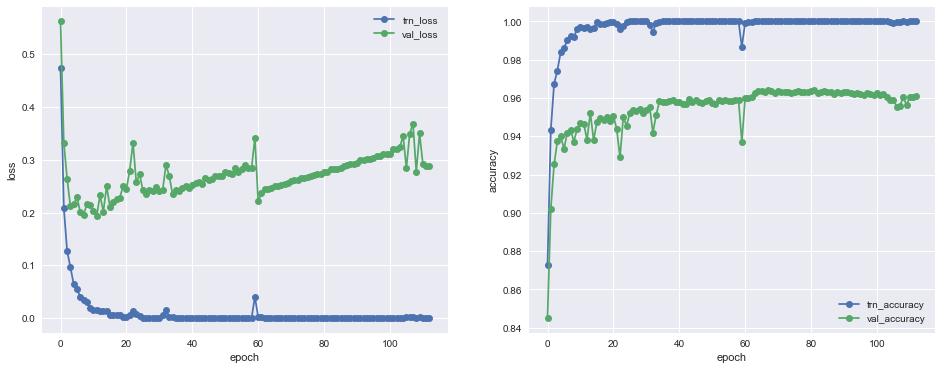

In [37]:
plot_history(model_name)

In [28]:
# #### FINE TUNING #### # 
lr = 1e-5
EPOCHS = 100
early_stopping_patience = 75
resume_training = True

param = [lr, EPOCHS, BATCH_SIZE, l2_lambda, model_name, 
         resume_training, early_stopping_patience, epochs_print]

optimizer = tf.train.AdamOptimizer(learning_rate = lr)

In [64]:
train_nn(X_trn_pp, y_train, X_val_pp, y_valid, param)

Resuming previous training...

EPOCH: 0, lr: 0.00001 ...
Training Loss = 0.00526, Training Accuracy = 0.999
Validation Loss = 0.18960, Validation Accuracy = 0.960

EPOCH: 25, lr: 0.00001 ...
Training Loss = 0.00003, Training Accuracy = 1.000
Validation Loss = 0.28767, Validation Accuracy = 0.966

EPOCH: 50, lr: 0.00001 ...
Training Loss = 0.00000, Training Accuracy = 1.000
Validation Loss = 0.28987, Validation Accuracy = 0.965

EPOCH: 75, lr: 0.00001 ...
Training Loss = 0.00000, Training Accuracy = 1.000
Validation Loss = 0.34036, Validation Accuracy = 0.964

Early stopping.
Best monitored loss was 0.189603 at epoch 0.
Model saved


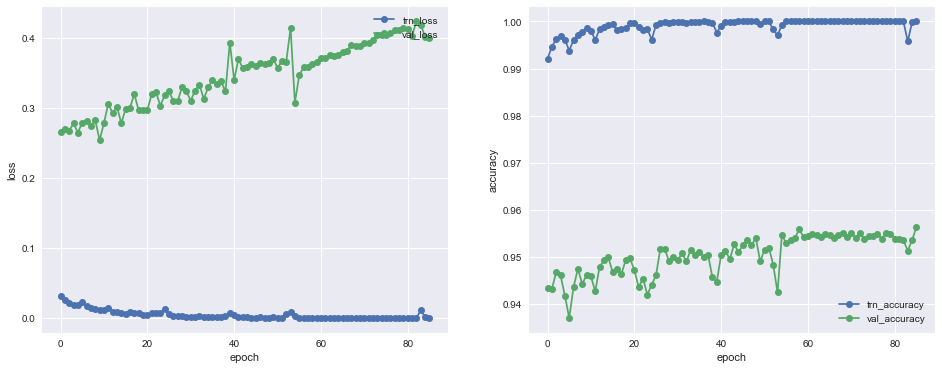

In [33]:
plot_history(model_name)

In [29]:
with tf.Session() as sess:
    saver.restore(sess, path + 'models/'+ model_name)

    test_accuracy = evaluate(X_val_pp, y_valid)
    print("Validation Accuracy = {:.3f}".format(test_accuracy))

Validation Accuracy = 0.962


We can see that preprocessing alone is enough for our minimum project requirements, but can we do better? Definetly!

### Data Augmentation

For this part I created a function that will randomly rotate, scale and translate our images with the same parameters as implemented in [2]

Sermanet and LeCun also suggested that their model could perform better if they added some Real-world deformations, such as motion blur and shape deformations. So I decided to add them to our pipeline as well.


- Rotation between -15 and 15 degrees
- Scaling between 0.9 and 1.1
- Translation between -2 and 2 pixels

I have also added a shear transformation and motion blur as suggested by the authors at the summary of their work. The parameters for this new transformations are:

- Shear limit between -10 and 10 degrees
- Motion blur kernel size of 3 pixels


From Left to right: Original Img, Histogram Equalization, Rotate, Motion Blur and Affine


/home/bruno/anaconda3/envs/deeplearning/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


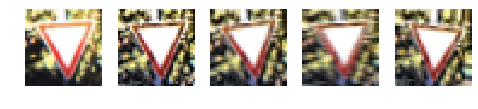

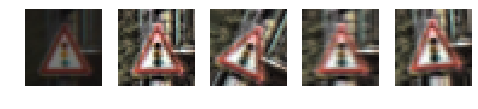

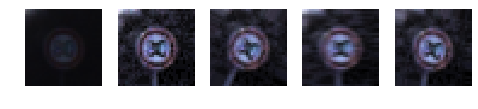

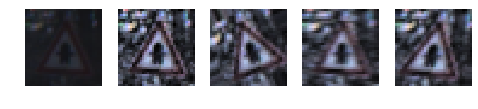

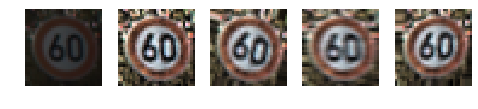

In [30]:
rnd_idx = random.sample(range(len(X_train)), 5)
print ("From Left to right: Original Img, Histogram Equalization, Rotate, Motion Blur and Affine")
for i in range(5):
    implot = plt.figure(figsize=(8,3))
    
    ax = implot.add_subplot(1,5,1)
    ax.grid(False)
    ax.axis('off')
    ax.imshow(X_train[rnd_idx[i]])
    
    ax = implot.add_subplot(1,5,2)
    ax.grid(False)
    ax.axis('off')
    ax.imshow(Adapthisteq(X_train[rnd_idx[i]]))

    ax = implot.add_subplot(1,5,3)
    ax.grid(False)
    ax.axis('off')
    ax.imshow(Rotate(Adapthisteq(X_train[rnd_idx[i]])))
    
    ax = implot.add_subplot(1,5,4)
    ax.grid(False)
    ax.axis('off')
    ax.imshow(Motionblur(Adapthisteq(X_train[rnd_idx[i]])))
    
    ax = implot.add_subplot(1,5,5)
    ax.grid(False)
    ax.axis('off')
    ax.imshow(Affine(Adapthisteq(X_train[rnd_idx[i]])))

plt.show()

Now we will add all these transformations to our training data set and then shuffle and save it with a a new name for convenience. That way we don't need to redo these steps every time we want to run our model.

In [29]:
#X_trn_aug, y_trn_aug = Augment_dataset(X_trn_pp, y_train, augs=6)

In [30]:
#X_trn_aug, y_trn_aug = shuffle(X_trn_aug, y_trn_aug)

In [31]:
#save_array(path+'models/X_train_augmented.dat', X_trn_aug)
#save_array(path+'models/y_train_augmented.dat', y_trn_aug)

In [32]:
# THE AUGMENTED DATASET WAS ALREADY SAVED WITH MEAN = 0
X_trn_aug = load_array(path+'models/X_train_augmented.dat')
y_trn_aug = load_array(path+'models/y_train_augmented.dat')

In [33]:
y_trn_aug_hot = np_utils.to_categorical(y_trn_aug)

Now with a dataset that is 7x larger than the original we can see if we improve our results on the same LeNet architecture

In [34]:
# #### CONTROL PANEL #### #

model_name = 'lenet_aug'

EPOCHS = 30
BATCH_SIZE = 64

lr = 1e-3
l2_lambda = 1e-4

resume_training = False

early_stopping_patience = 25
epochs_print = 10

X_tr = X_trn_aug
y_tr = y_trn_aug
X_vl = X_val_pp
y_vl = y_valid


param = [lr, EPOCHS, BATCH_SIZE, l2_lambda, model_name, 
         resume_training, early_stopping_patience, epochs_print]

optimizer = tf.train.AdamOptimizer(learning_rate = lr)
loss_operation = tf.reduce_mean(cross_entropy) + l2_lambda/2 * (reg_fc3 + reg_fc4)

In [36]:
train_nn(X_tr, y_tr, X_vl, y_vl, param)

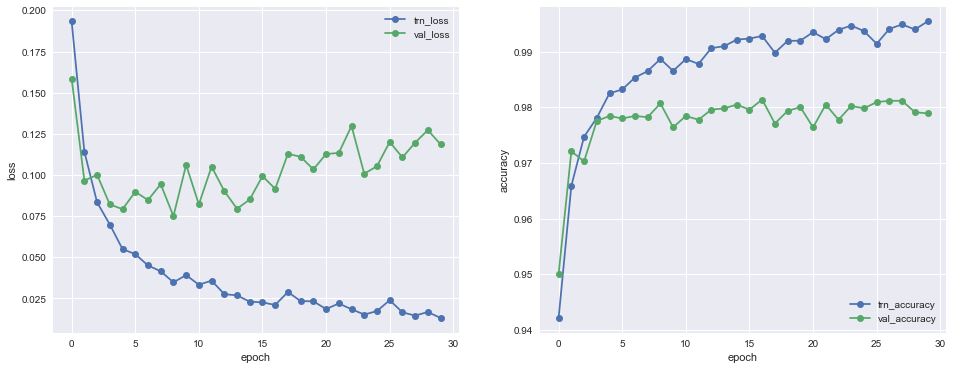

In [93]:
plot_history(model_name)

In [37]:
# #### FINE TUNING #### # 
lr = 1e-5
EPOCHS = 50
early_stopping_patience = 25
resume_training = True

param = [lr, EPOCHS, BATCH_SIZE, l2_lambda, model_name, 
         resume_training, early_stopping_patience, epochs_print]

optimizer = tf.train.AdamOptimizer(learning_rate = lr)

In [95]:
train_nn(X_tr, y_tr, X_vl, y_vl, param)

Resuming previous training...

EPOCH: 0, lr: 0.00001 ...
Training Loss = 0.01411, Training Accuracy = 0.995
Validation Loss = 0.14611, Validation Accuracy = 0.978

EPOCH: 10, lr: 0.00001 ...
Training Loss = 0.01194, Training Accuracy = 0.996
Validation Loss = 0.13311, Validation Accuracy = 0.982

EPOCH: 20, lr: 0.00001 ...
Training Loss = 0.01035, Training Accuracy = 0.996
Validation Loss = 0.13814, Validation Accuracy = 0.980

Early stopping.
Best monitored loss was 0.125640 at epoch 1.
Model saved


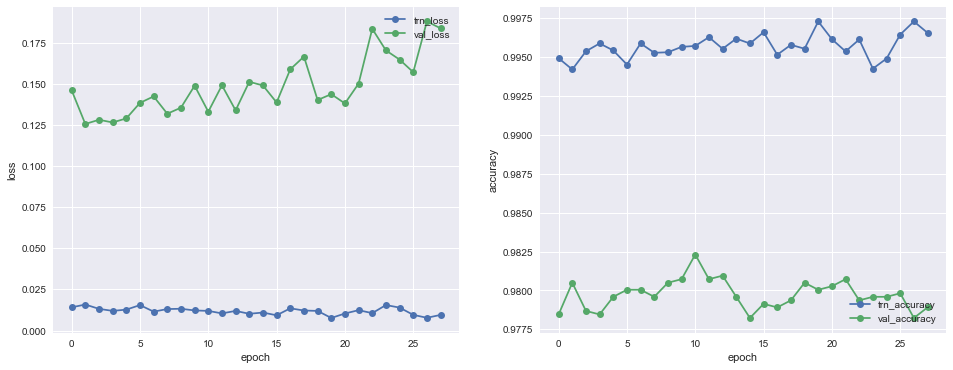

In [96]:
plot_history(model_name)

In [100]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(path+'models/'))

    test_accuracy = evaluate(X_val_pp, y_valid)
    print("Validation Accuracy = {:.3f}".format(test_accuracy))

Validation Accuracy = 0.980


Data augmentation gave us a 2% increase over our benchmark LeNet + preprocessing. A better early stopping and fine tuning approach can probably increase the 98% accuracy we have here, but I am not sure by how much. This result is close to what Sermanet and LeCun [2] achieved during the first phase of the actual GTSRB competition with their lowest performing models.

## MORE MODERN ARCHITECTURES

The results above are certainly interesting and almost on par with human performance and they were achieved using a NN architecture from 1998! Since then there were many new developments in the field and inspired by the great results shown by some other students [5] and [6], I would like to draw a comparison between the performance of LeNet-5 and more modern convnets architectures.

At this point I decided to use Keras instead of raw TensorFlow. Keras is a nice wrapper for TF that allows us to quickly prototype and test models.

To showcase the power of recently developed tools I put together a model that has 3 blocks that are built as follows:

- Convolution (Kernel: 3x3, Stride: 1)
- Batch Normalization
- Relu
- Convolution (Kernel: 3x3, Stride: 1)
- Batch Normalization
- Relu
- Convolution (Kernel: 2x2, Stride: 2) - This replaces the maxpooling layer
- Dropout (p: 0.2)

After each block the size of the input is halfed, but the depth of the convolutions double.

Here is the full model architecture:

- Input(32, 32, 3 or 32, 32, 1 - depending on whether you are passing on color or gray scale images)


- Convolution (Kernel: 3x3, Depth: 32, Stride: 1)
- Batch Normalization
- Relu
- Convolution (Kernel: 3x3, Depth: 32, Stride: 1)
- Batch Normalization
- Relu
- Convolution (Kernel: 2x2, Depth: 32, Stride: 2)
- Dropout (p: 0.2)


- Convolution (Kernel: 3x3, Depth: 64, Stride: 1)
- Batch Normalization
- Relu
- Convolution (Kernel: 3x3, Depth: 64, Stride: 1)
- Batch Normalization
- Relu
- Convolution (Kernel: 2x2, Depth: 64, Stride: 2)
- Dropout (p: 0.2)


- Convolution (Kernel: 3x3, Depth: 128, Stride: 1)
- Batch Normalization
- Relu
- Convolution (Kernel: 3x3, Depth: 128Stride: 1)
- Batch Normalization
- Relu
- Convolution (Kernel: 2x2, Depth: 128Stride: 2)
- Dropout (p: 0.2)


- Flatten
- Fully Connected layer (Size: 512, activation: Relu)
- Dropout (p: 0.5)
- Softmax (n_classes = 43)

I believe this is a good selection of most of the important techniques that have been adopted by the industry. I intentionally left out Inception and Residual Neural Net modules as they tend to perform well on much deeper models although they would certainly perform well on our problem, given the power of such models. 

I have also decided to keep the structure of the NN on a conventional way, I believe this will have an impact on our prediction capabilities as the best results I've seen out there are following the same approach as in [2], but by keeping our model with a similar form as the one from LeNet we can more accurately compare the performance between these two models.

In the references section of the notebook you will find links to all of the sources that inspired this study.

In [33]:
from __future__ import print_function
from keras.callbacks import CSVLogger, LearningRateScheduler, TensorBoard
from keras.layers import Convolution2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense, Input, Activation
from keras.models import Model
from keras.optimizers import SGD




In [28]:
def modern_cnn(n_classes=10, img_width=32, img_height=32, color_channels=3):
    """
    This is a more modern approach to convnets, featuring many of the state-of-the-art concepts
    introduced over the past few years.
    
    1 - Xavier weight initialization
    http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf
    
    2 - Batch Normalization
    https://arxiv.org/pdf/1502.03167.pdf
    
    3 - Dropout
    http://www.jmlr.org/papers/volume15/srivastava14a.old/source/srivastava14a.pdf
    
    4 - No Max Pooling - higher stride conv is used to avoid information loss
    https://arxiv.org/pdf/1412.6806.pdf
    
    """


    img_input = Input(shape=(img_width, img_height, color_channels), name='input_img')
    
    # Block 1:
    x = Convolution2D(32, 3, 3, 
                      border_mode='same', 
                      activation='relu',
                      init='glorot_normal', 
                      name='conv_1a')(img_input)
    x = BatchNormalization(name='bn_1a')(x)
    x = Activation('relu', name='relu_1a')(x)
    x = Convolution2D(32, 3, 3, 
                      border_mode='same', 
                      activation='relu',
                      init='glorot_normal', 
                      name='conv_1b')(x)
    x = BatchNormalization(name='bn_1b')(x)
    x = Activation('relu', name='relu_1b')(x)
    x = Convolution2D(32, 2, 2, 
                      border_mode='valid', 
                      activation='relu',
                      init='glorot_normal',
                      subsample = (2, 2),
                      name='conv_pool_1')(x)
    x = Dropout(0.2, name='dropout_1')(x)

    # Block 2:
    x = Convolution2D(64, 3, 3, 
                      border_mode='same', 
                      activation='relu',
                      init='glorot_normal', 
                      name='conv_2a')(x)
    x = BatchNormalization(name='bn_2a')(x)
    x = Activation('relu', name='relu_2a')(x)
    x = Convolution2D(64, 3, 3, 
                      border_mode='same', 
                      activation='relu',
                      init='glorot_normal', 
                      name='conv_2b')(x)
    x = BatchNormalization(name='bn_2b')(x)
    x = Activation('relu', name='relu_2b')(x)
    x = Convolution2D(64, 2, 2, 
                      border_mode='valid', 
                      activation='relu',
                      init='glorot_normal',
                      subsample = (2, 2),
                      name='conv_pool_2')(x)
    x = Dropout(0.2, name='dropout_2')(x)

    # Block 3:
    x = Convolution2D(128, 3, 3, 
                      border_mode='same', 
                      activation='relu',
                      init='glorot_normal', 
                      name='conv_3a')(x)
    x = BatchNormalization(name='bn_3a')(x)
    x = Activation('relu', name='relu_3a')(x)
    x = Convolution2D(128, 3, 3, 
                      border_mode='same', 
                      activation='relu',
                      init='glorot_normal', 
                      name='conv_3b')(x)
    x = BatchNormalization(name='bn_3b')(x)
    x = Activation('relu', name='relu_3b')(x)
    x = Convolution2D(128, 2, 2, 
                      border_mode='valid', 
                      activation='relu',
                      init='glorot_normal',
                      subsample = (2, 2),
                      name='conv_pool_3')(x)
    x = Dropout(0.2, name='dropout_3')(x)

    # Fully Connected:
    x = Flatten(name='flatten_4')(x)
    x = Dense(512, activation='relu', name='fc_6')(x)
    x = Dropout(0.5, name='dropout_7')(x)
    x = Dense(n_classes, activation='softmax', name='logits')(x)
    
    return Model(img_input, x, name='modern')

One of many benefits of Batch Normalization is that it also allows for larger learning rates. We will start with a learning rate 10x larger than the one we used in our LeNet 5 implementation above, but to avoid having to run a training and a fine tuning step I am also implementing a learning rate decay function that will divide our learning rate by 10 every 10 epochs.

In [29]:
def lr_decay(epoch):
    return lr*(0.1**np.floor(epoch/10))

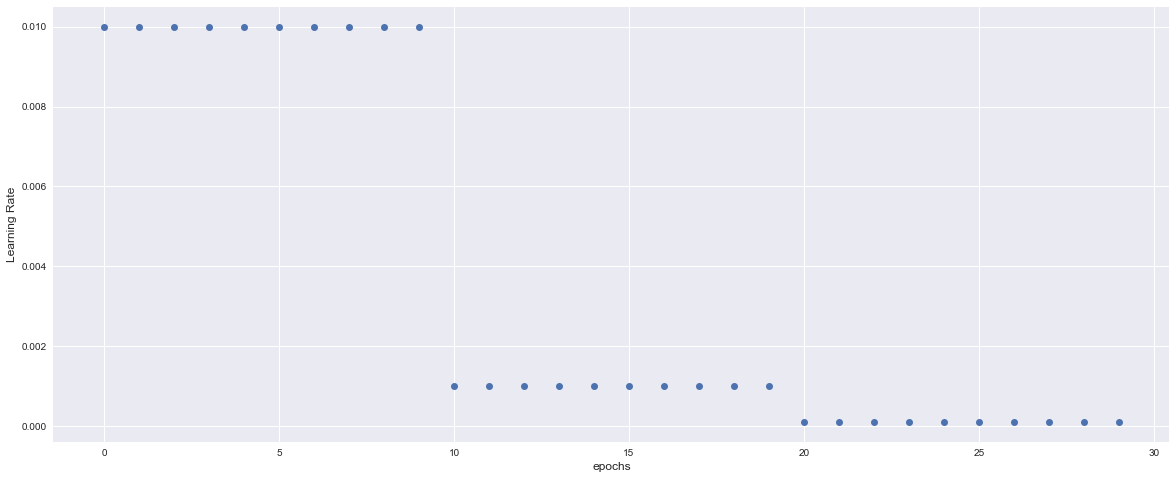

In [30]:
lr = 0.01
lr_plot = [lr_decay(epoch) for epoch in range(30)]

plt.figure(figsize=(20,8))
plt.plot(lr_plot, 'o')
plt.xlabel('epochs', fontsize=12)
plt.ylabel('Learning Rate', fontsize=12)
plt.show()


In [31]:
modern_cnn = modern_cnn(n_classes=43,color_channels=1)

In [35]:
tbCallBack = TensorBoard(path+'models/', write_graph=True, write_images=True)

In [36]:
lr = 1e-10
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
modern_cnn.compile(loss='categorical_crossentropy',
          optimizer=sgd,
          metrics=['accuracy'])

In [41]:
batch_size = 64
nb_epoch = 1

csv_logger = CSVLogger('modern_cnn_GTSRB.csv')

modern_cnn.fit(X_trn_pp[0:10], y_trn_hot[0:10],
          batch_size=batch_size,
          nb_epoch=nb_epoch,
          validation_data=(X_val_pp, y_val_hot),
          shuffle=True,
          verbose=0,
          callbacks=[tbCallBack])

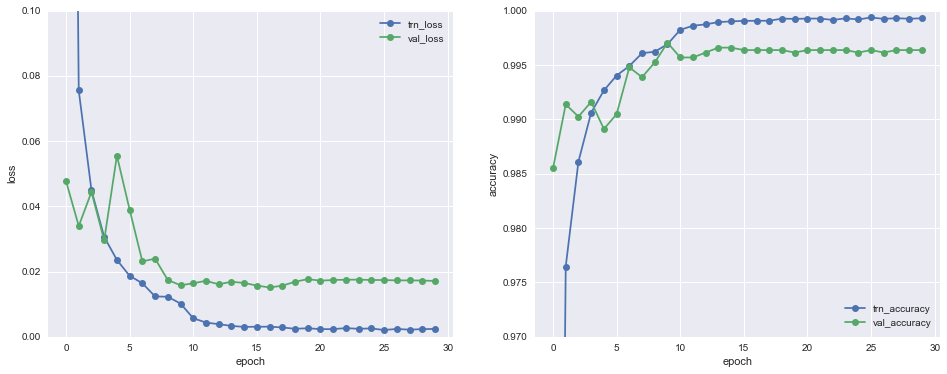

In [143]:
implot = plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(new_modern_model.history.history['loss'], '-o')
plt.plot(new_modern_model.history.history['val_loss'], '-o')
plt.legend(['trn_loss', 'val_loss'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim([0, 0.10])

plt.subplot(1,2,2)
plt.plot(new_modern_model.history.history['acc'], '-o')
plt.plot(new_modern_model.history.history['val_acc'], '-o')
plt.legend(['trn_accuracy', 'val_accuracy'], loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0.97, 1])

plt.show()

In [134]:
#modern_cnn.save_weights(path+'models/modern_cnn.h5')

In [34]:
modern_cnn.load_weights(path+'models/modern_cnn.h5')

In [44]:
modern_cnn_eval = modern_cnn.evaluate(X_val_pp, y_val_hot, verbose=0)
print("Validation Accuracy = {:.3f}".format(modern_cnn_eval[1]))

Validation Accuracy = 0.996


Now that's an improvement! We now have a model that is better at recognizing traffic signs than the average person, at least on our validation set. It still has the vanilla CNN approach where all blocks are connected to each other, but we used many of the state of the art layers that are widely used by the industry.

Finally we get to see how our model is doing in the test set...

In [45]:
X_tst_pp = preprocess_array(X_test)
X_tst_pp -= pp_mean
y_tst_hot = np_utils.to_categorical(y_test)

In [46]:
predicted_test = modern_cnn.predict(X_tst_pp)

In [47]:
predicted_probs = modern_cnn.predict(X_tst_pp, verbose=0)
predicted_labels = np.argmax(predicted_test, axis=1)

In [48]:
modern_cnn_eval = modern_cnn.evaluate(X_tst_pp, y_tst_hot, verbose=0)
print("Test Accuracy = {:.3f}".format(modern_cnn_eval[1]))

Test Accuracy = 0.979


This is still falling short of human performance. It's usually the case that your model will perform better on the validation set because your model was optimized to give you the best result possible with that set of data in mind.

Getting your model to generalize well is one of the most difficult parts of tuning it.

In [49]:
incorrect = np.where(predicted_labels!=y_test)[0]
print ("Incorrect predictions: ", incorrect.shape[0])

Incorrect predictions:  267


So we got 267 signs wrong, let's see what they have in common.

In [50]:
incorrect_classes = [y_test[i] for i in incorrect]
df2 = pd.DataFrame.from_dict(collections.Counter(incorrect_classes), orient='index')
df2 = df2.rename(columns={'index':'ClassId', 0:'Incorrect'})

sign_names['Incorrect'] = df2['Incorrect']
sign_names.fillna(value=0, inplace=True)

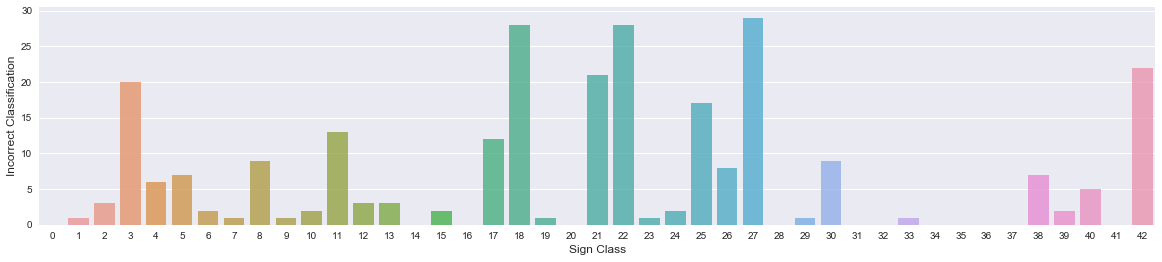

In [51]:
plt.figure(figsize=(20,4))
sns.barplot(sign_names['ClassId'].values, sign_names['Incorrect'].values, alpha=0.8)
plt.xlabel('Sign Class', fontsize=12)
plt.ylabel('Incorrect Classification', fontsize=12)
plt.show()

It seems that most of our errors are concentrated in less than 10 classes, but aside from that the chart above doesn't really give us much more information.

Let's use a confusion matrix to give us more color.

[[ 60   0   0 ...,   0   0   0]
 [  0 719   0 ...,   0   0   0]
 [  0   2 747 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,  85   0   0]
 [  0   0   0 ...,   0  60   0]
 [  0   0   0 ...,   0  12  68]]


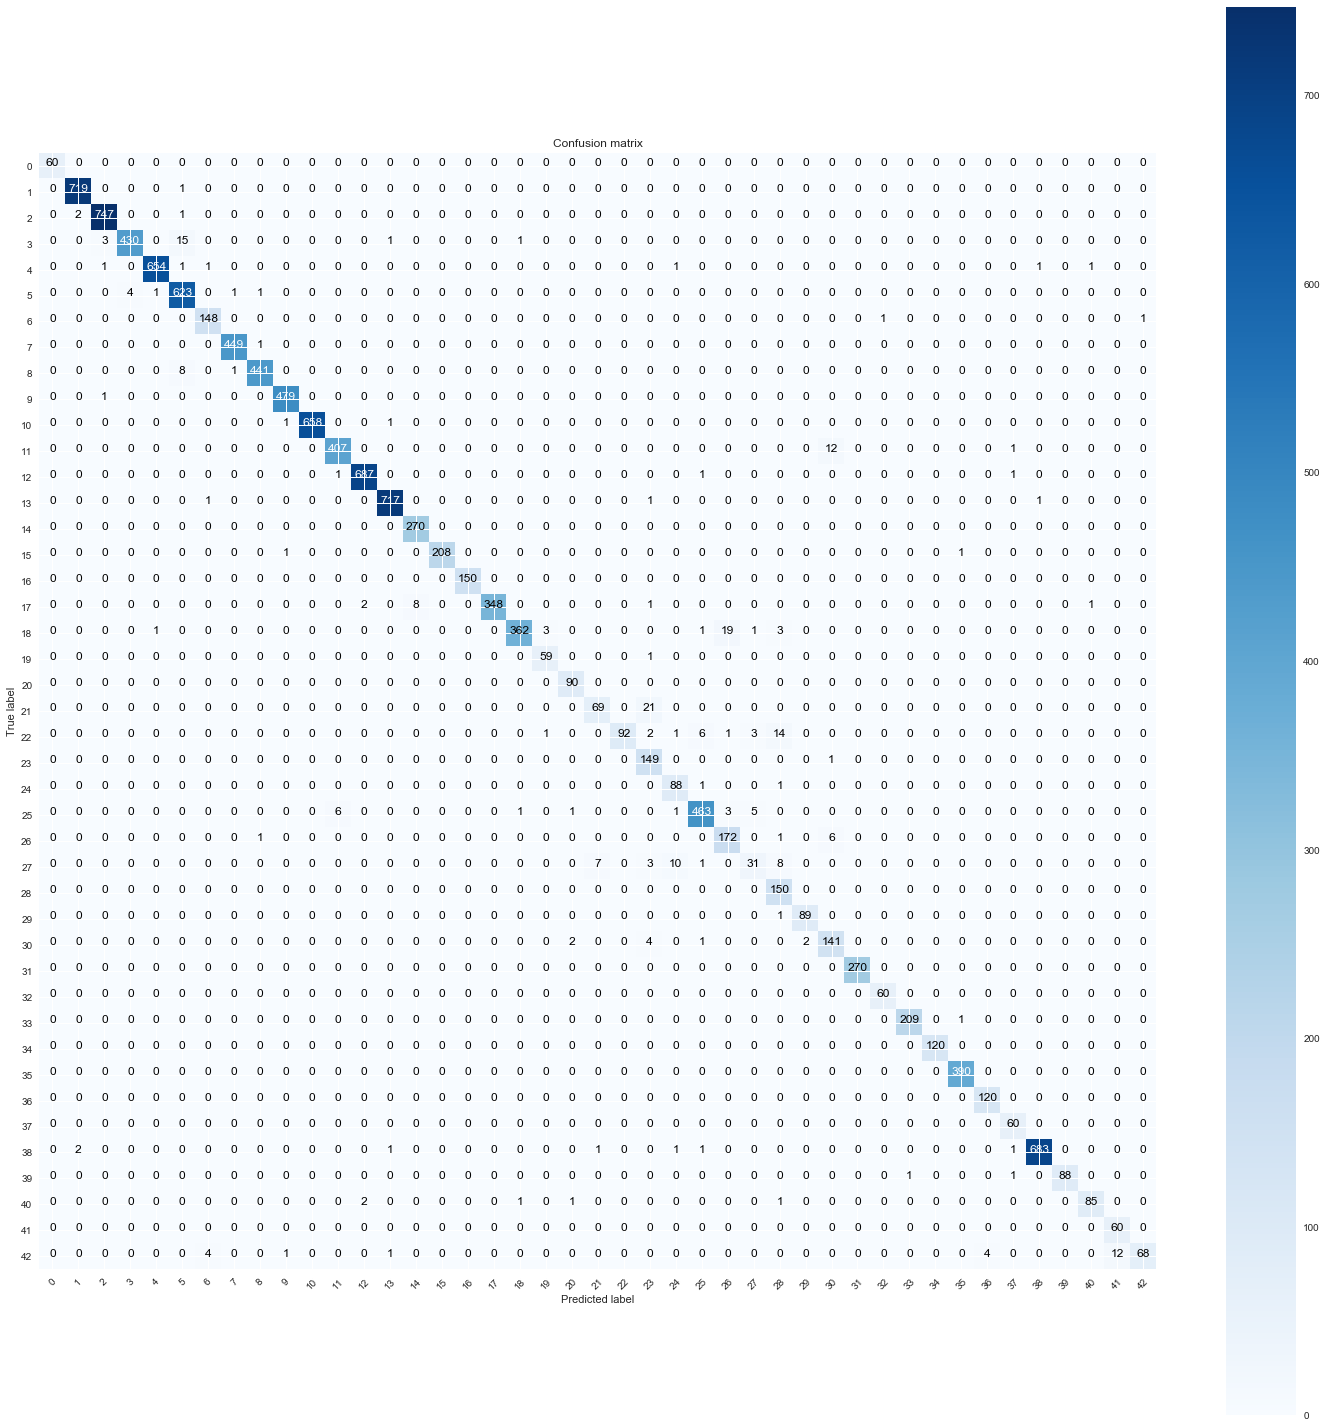

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_labels)
plot_confusion_matrix(cm, sign_names['ClassId'].values)

So class 3 was mostly confused with class 5, class 18 with 27, 21 and 23, 22 and 28, 27 with 23 and 28 and class 42 was mostly mistaken to be class 41.

We will plot again a few examples of these classes side by side to see if it gives us any hints as to why we are misclassifying them.

Speed limit (60km/h) :


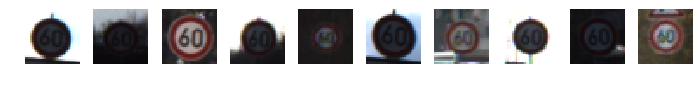

was confused with:
Speed limit (80km/h) :


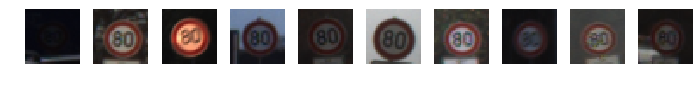

General caution :


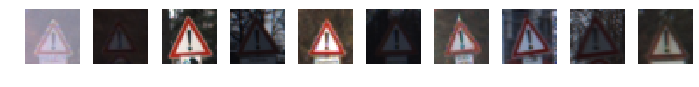

was confused with:
Pedestrians :


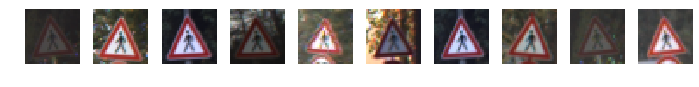

Double curve :


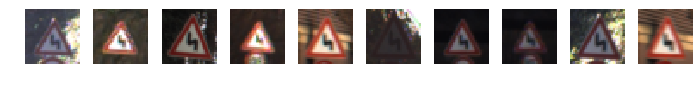

was confused with:
Slippery road :


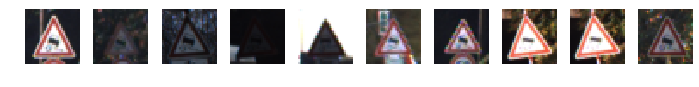

Bumpy road :


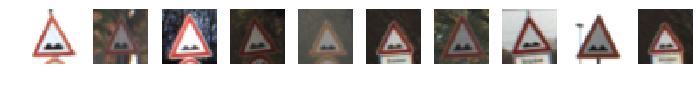

was confused with:
Children crossing :


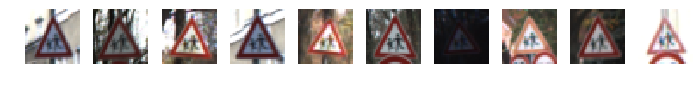

Pedestrians :


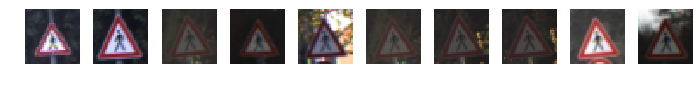

was confused with:
Slippery road :


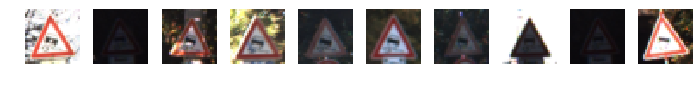

Children crossing :


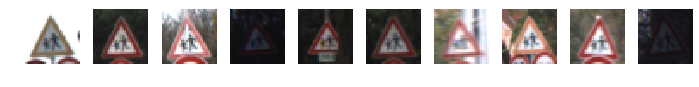

End of no passing by vehicles over 3.5 metric tons :


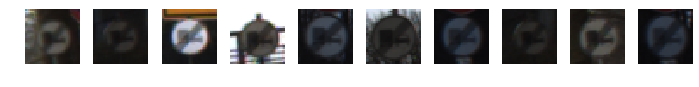

was confused with:
End of no passing :


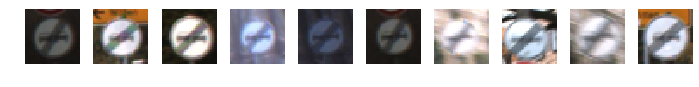

In [53]:
study_range = [3, 5, 18, 27, 21, 23, 22, 28, 27, 23, 28, 42, 41]
compare = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]
implot = plt.figure(figsize=(12,4))
counter = 0
for classid in study_range:
    print (sign_names.SignName[classid],':')
    implot = plt.figure(figsize=(12,1))
    X_class = X_train[y_train_copy==classid]
    rnd_idx = random.sample(range(len(X_class)), 10)
    for i in range(10):
        ax = implot.add_subplot(1,10,i + 1)
        ax.grid(False)
        ax.axis('off')
        ax.imshow(X_class[rnd_idx[i]])
    plt.show()
    if compare[counter]:
        print ('was confused with:')
    counter += 1

It's interesting to see that most mistakes happened with signs that are very similar in form, and although slippery road was confused with bumpy road (both have blobs inside the sign) it wasn't confused with pedestrians or double curve (they have lines inside the sign).

This may be one of the reasons why our model is under performing the work done by [5] and [6]. When we chose a more common NN approach without feature sharing, we told the network to only worry about the features as extracted by the top of our network, while the other approach allows the model to pick and choose from a wider set of features as to which would be more relevant to further differentiate between those classes.

This leads me to believe that ResNets would also be a very powerfull tool to use in this problem as they allow feature information to flow further down your model as well.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

With the limitations of our network in mind I chose the new test set to be on those cases where we already know that the model is underperforming. It may give us insights as to how bad we are actually doing and see if there is a solution not as drastic as redesigning the whole network architecture.

### Load and Output the Images

In [154]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [155]:
import os
import cv2

def read_all_imgs(path, color=cv2.IMREAD_COLOR):

    images = []
    filenames = []
    
    filelist = os.listdir(path)
    
    for file in filelist:
        
        try:
            img = cv2.imread(path+file, color)
        except:
            img = None
        
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_CUBIC)
            images.append(img)
            filenames.append(file)
    
    return images, filenames

In [156]:
new_img, new_img_filename = read_all_imgs(path + 'input/new_images/')
new_img = np.array(new_img)

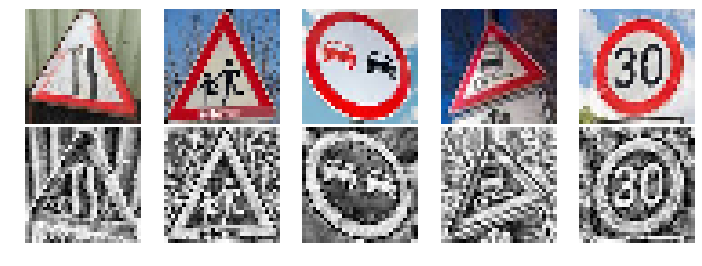

In [157]:
implot = plt.figure(figsize=(12,8))
for i in range(5):
    ax1 = implot.add_subplot(2,5,i + 1)
    ax1.grid(False)
    ax1.axis('off')
    ax1.imshow(new_img[i])

    ax2 = implot.add_subplot(1,5,i + 1)
    ax2.grid(False)
    ax2.axis('off')
    ax2.imshow(img_preprocess(new_img[i])[:, :, 0])

plt.show()

### Predict the Sign Type for Each Image

In [158]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [159]:
X_test_new = preprocess_array(new_img)
X_test_new -= pp_mean

In [160]:
test_new_pred = modern_cnn.predict(X_test_new)

In [161]:
test_new_class = np.argmax(test_new_pred, axis=1)

Children crossing :


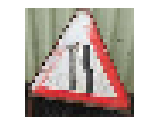

Children crossing :


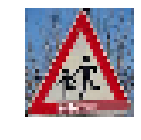

Speed limit (70km/h) :


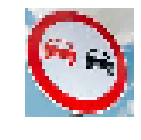

Slippery road :


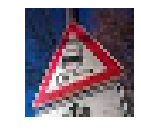

Speed limit (30km/h) :


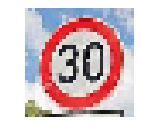

In [171]:
for i in range(len(test_new_class)):
    print (sign_names.SignName[test_new_class[i]],':')
    plot_img(new_img[i])
    plt.show()

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

Accuracy: 60% - As expected we didn't do too well on this limited sample. But that's fine, they were chosen to be difficult for the model to classify. The idea of this sample was to give us more information about where are are getting things wrong.

On the next session we will plot the top5 probabilities instead of just the most likely class.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

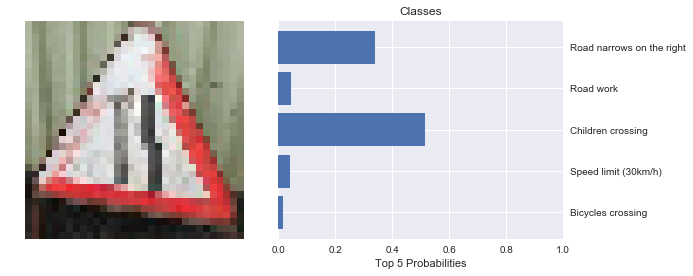

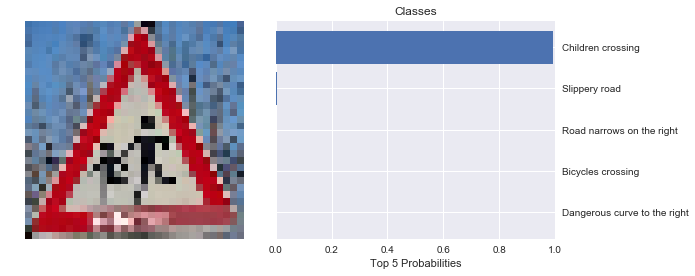

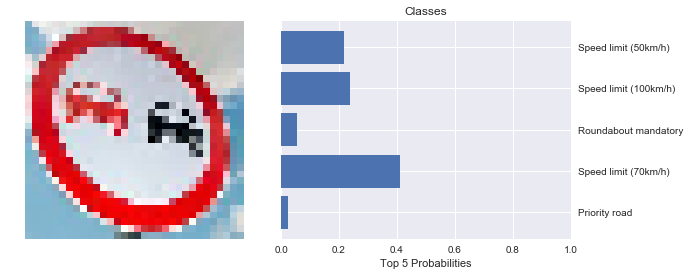

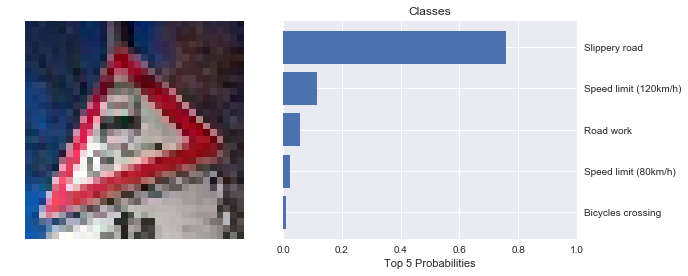

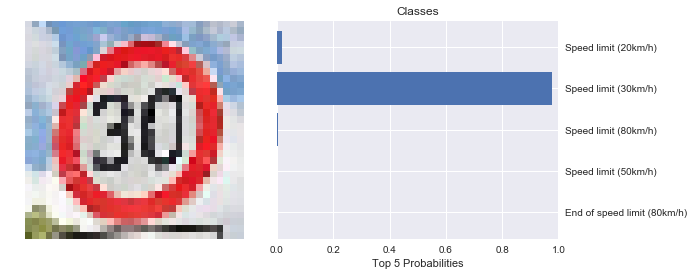

In [202]:
for i in range(len(test_new_class)):
    top5_classes = np.array(sign_names.SignName[top5[i, :]])
    top5_probs = np.array(test_new_pred[i, top5[i, :]])

    implot = plt.figure(figsize=(10,4))

    ax = implot.add_subplot(1,2,1)
    ax.grid(False)
    ax.axis('off')
    ax.imshow(new_img[i])

    #classes = test_names
    #probs = test_probs
    y_pos = np.arange(len(top5_classes))

    ax2 = implot.add_subplot(1,2,2)
    ax2.barh(y_pos, top5_probs, align='center')
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(top5_classes)
    ax2.yaxis.set_ticks_position('right')
    ax2.set_xlabel('Top 5 Probabilities')
    ax2.set_title('Classes')
    ax2.set_xlim([0, 1])
    
    plt.tight_layout()

    plt.show()

We can see that in the first misclassification our model was actually in doubt between the correct class and one alternative, while on the second case that we got things wrong the model had no clue what that sign was and was in doubt amongst several speed limit signs, that share the same shape with that sign.

What is interesting is that no passing is a class that has a very good representation on our training set and according to our confusion matrix is one that we are almost always getting right. The preprocessing of that image seems to be ok, at least visually. So that was a surprise.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [290]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [335]:
# Placeholder for learning phase:
K.set_learning_phase(0)

# Build a model:
model = new_modern(n_classes=43,color_channels=1)

# Load weights:
model.load_weights(path+'models/modern_cnn.h5')

# Placeholder for input:
input_img = model.input

# all layer outputs:
outputs = [layer.output for layer in model.layers]

# evaluation function
evaluate = K.function([input_img], outputs )

# Testing
test = X_trn_pp[2].reshape(1, 32, 32, 1)
layer_outs = evaluate([test, 1.])
#print layer_outs

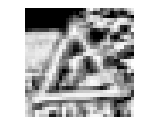

In [336]:
plot_img(X_trn_pp[2])

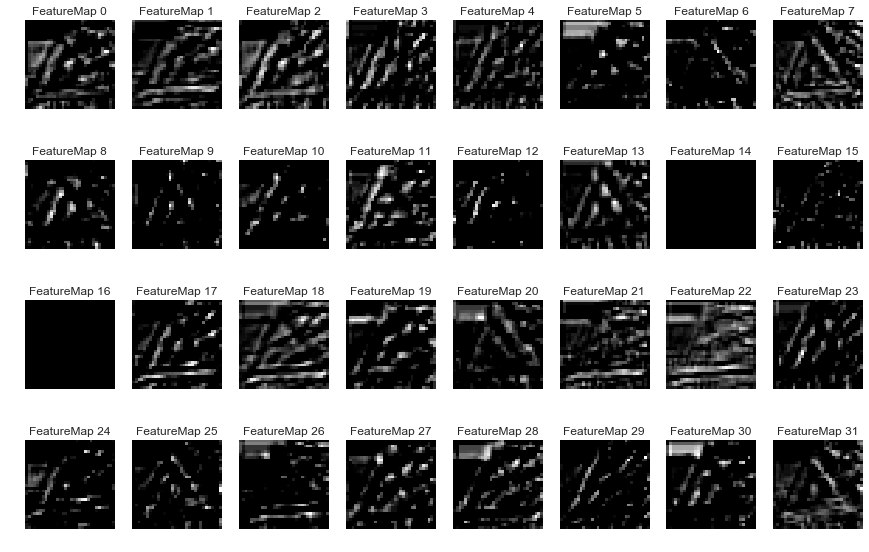

In [352]:
activation = layer_outs[4]
activation_min = -1
activation_max = -1 
featuremaps = activation.shape[3]
plt.figure(1, figsize=(15,15))
for featuremap in range(featuremaps):
    plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
    plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
    plt.axis('off')
    if activation_min != -1 & activation_max != -1:
        plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
    elif activation_max != -1:
        plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
    elif activation_min !=-1:
        plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
    else:
        plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

We can also see in general how the filters look for the weights of the net. You will find below the weight visualization for layer: conv_2b

In [289]:
"""
forked from: https://github.com/fchollet/keras/blob/master/examples/conv_filter_visualization.py
"""

import time
from scipy.misc import imsave
from keras import backend as K

# dimensions of the generated pictures for each filter.
img_width = 32
img_height = 32

# the name of the layer we want to visualize
layer_name = 'conv_2b'


# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

# Placeholder for learning phase
K.set_learning_phase(1)

# Build a model:
model = new_modern(n_classes=43,color_channels=1)

# Load weights
model.load_weights(path+'models/modern_cnn.h5')

# Placeholder for input:
input_img = model.input

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])

# utility function to normalize a tensor by its L2 norm
def normalize(x):
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)


kept_filters = []
for filter_index in range(0, 64):
    # we only scan through the first 64 filters,
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    # input_img_data = np.random.random((1, img_width, img_height, 1))
    # input_img_data = (input_img_data - 0.5) * 20 + 128
    input_img_data = X_trn_pp[5].reshape(1, 32, 32, 1)

    # we run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

        print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        img = deprocess_image(input_img_data[0])
        kept_filters.append((img, loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))

# we will stich the best 25 filters on a 5 x 5 grid.
n = 8

# the filters that have the highest loss are assumed to be better-looking.
# we will only keep the top 25 filters.
kept_filters.sort(key=lambda x: x[1], reverse=True)
kept_filters = kept_filters[:n * n]

# build a black picture with enough space for
# our n x n filters of size w x h, with a 5px margin in between
margin = 5
width = n * img_width + (n - 1) * margin
height = n * img_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

# fill the picture with our saved filters
for i in range(n):
    for j in range(n):
        img, loss = kept_filters[i * n + j]
        stitched_filters[(img_width + margin) * i: (img_width + margin) * i + img_width,
                         (img_height + margin) * j: (img_height + margin) * j + img_height, :] = img

# save the result to disk
imsave('stitched_filters_%dx%d.png' % (n, n), stitched_filters)




Processing filter 0
Current loss value: 0.425933
Current loss value: 0.401434
Current loss value: 0.664199
Current loss value: 0.901464
Current loss value: 1.05302
Current loss value: 1.09637
Current loss value: 1.16839
Current loss value: 1.18842
Current loss value: 1.24193
Current loss value: 1.26152
Current loss value: 1.28496
Current loss value: 1.30034
Current loss value: 1.34089
Current loss value: 1.37576
Current loss value: 1.37674
Current loss value: 1.40055
Current loss value: 1.41382
Current loss value: 1.39876
Current loss value: 1.4681
Current loss value: 1.43228
Filter 0 processed in 5s
Processing filter 1
Current loss value: 0.472485
Current loss value: 0.514291
Current loss value: 0.757959
Current loss value: 1.02595
Current loss value: 1.20731
Current loss value: 1.35634
Current loss value: 1.45853
Current loss value: 1.60257
Current loss value: 1.70504
Current loss value: 1.75801
Current loss value: 1.7821
Current loss value: 1.91171
Current loss value: 1.97796
Curren

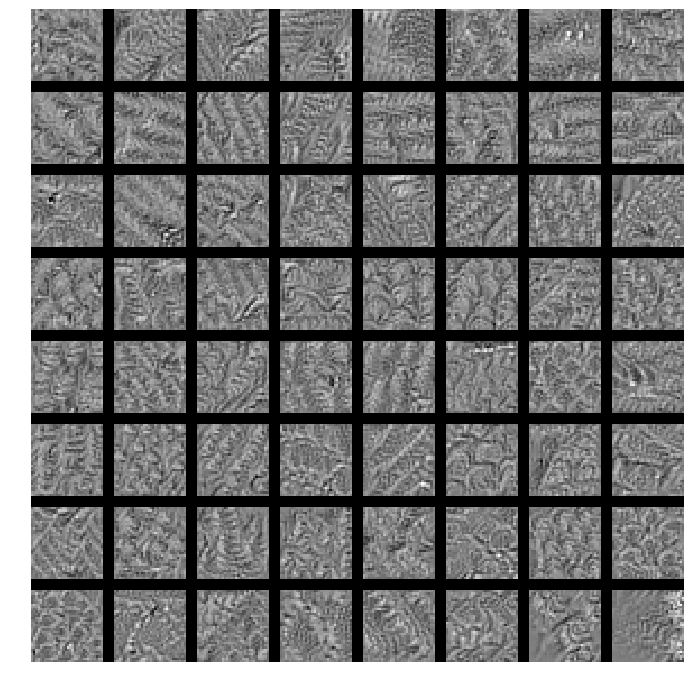

In [291]:
nn_view = cv2.imread(path+'stitched_filters_8x8_conv2b.png', cv2.IMREAD_COLOR)
nn_view = cv2.cvtColor(nn_view, cv2.COLOR_BGR2RGB)
plot_img(nn_view, figsize=(12, 12))

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images

**Answer:**

The images from the 4th convolution show that at that point the model was looking at shapes and textures from the sign. The preprocessed images are quite difficult to analyze given that they are low res, small and converted to gray scale.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

### References

[1] [Multi-Column Deep Neural Network for Traffic Sign
Classification](http://people.idsia.ch/~juergen/nn2012traffic.pdf)

[2] [Traffic Sign Recognition with Multi-Scale Convolutional Networks](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)

[3] [What is the Best Multi-Stage Architecture for Object Recognition?](http://yann.lecun.com/exdb/publis/pdf/jarrett-iccv-09.pdf)

[4] [Gradient-Based Learning Applied to Document Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)

[5] [Traffic signs classification with a convolutional network](http://navoshta.com/traffic-signs-classification/)

[6] [Updated! My 99.68% solution to Udacity Nanodegree project P2 (Traffic Sign Classification)](https://medium.com/@hengcherkeng/updated-my-99-68-solution-to-udacity-nanodegree-project-p2-traffic-sign-classification-56840768dec8)

[7] [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf)

[8] [Inception-v4, Inception-ResNet and the Impact of Residual Connections on Learning](https://arxiv.org/pdf/1602.07261.pdf)

[9] [Tensorflow Models - Resnet](https://github.com/tensorflow/models/tree/master/resnet)

[10] [Keras-resnet](https://github.com/raghakot/keras-resnet)

[11] [Resnet-like network using full-preactivation](https://gist.github.com/JefferyRPrice/c1ecc3d67068c8d9b3120475baba1d7e)

[12] [CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/convolutional-networks/)

[13] [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/pdf/1502.03167.pdf)

[14] [Striving For Simplicity: The All Convolutional Net](https://arxiv.org/pdf/1412.6806.pdf)

[15] [Understanding the difficulty of training deep feedforward neural networks](http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf)

[16] [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](http://www.jmlr.org/papers/volume15/srivastava14a.old/source/srivastava14a.pdf)

[17] [Keras Tutorial - Traffic Sign Recognition](https://chsasank.github.io/keras-tutorial.html)
